In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [277]:
data = pd.read_csv('Exp_Octubre.csv', sep=';')
data.head()
data.drop(data[(data.bid == "\\N") |  (data.ask =="\\N") | (data.underBid == "\\N") | (data.underAsk == "\\N")].index, inplace = True)
data
data.loc[:, 'bid'] = data.bid.apply(lambda x: x.replace(',','.')).astype(float)
data.loc[:, 'ask'] = data.ask.apply(lambda x: x.replace(',','.')).astype(float)
data.loc[:, 'underBid'] = data.underBid.apply(lambda x: x.replace(',','.')).astype(float)
data.loc[:, 'underAsk'] = data.underAsk.apply(lambda x: x.replace(',','.')).astype(float)
better_data = data.copy()
better_data.drop(columns = ['description', 'strike', 'kind'],axis = 1, inplace=True)

#Dado que no voy a necesitar la descripcion, ni el valor strike ya que lo voy a agregar aparte en el programa en C++, tampoco me interesa el
#kind dado que ya se que es una opcion call voy a tirar esas columnas.

In [278]:
#Ahora vamos a tomar ambos valores bid y ask y realizamos un promedio en una nueva columna

better_data['price'] = (better_data.bid + better_data.ask)/2
better_data['underPrice'] = (better_data.underBid + better_data.underAsk)/2
better_data.drop(columns = ['bid', 'ask', 'underAsk', 'underBid'], axis = 1, inplace = True)
better_data

#Voy a tener que repensar esto, voy a necesitar las horas probablemente.

,created_at,price,underPrice
2,9/8/2023 11:30,297.653,1209.5
3,9/8/2023 11:32,301.849,1210.5
4,9/8/2023 11:33,301.859,1211.75
5,9/8/2023 11:34,301.859,1210.5
6,9/8/2023 11:35,301.859,1206.5
...,...,...,...
3291,10/19/2023 14:43,107.5005,1139.475
3292,10/19/2023 15:11,107.5005,1136.275
3293,10/19/2023 15:21,104.0005,1141.05
3294,10/19/2023 15:25,104.004,1143.5


In [279]:
better_data.loc[:, 'created_at'] = better_data.created_at.apply(lambda x: x.split(' ')[0])
better_data.loc[:, 'created_at'] = better_data.created_at.apply((lambda x: x.replace('/','-', 2)))
better_data.created_at = pd.to_datetime(better_data.created_at)

# date_list = better_data.created_at.unique().tolist()
# better_data.created_at.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y'))
# dated_dates = datetime.datetime.('9/8/2023','%m/%d/%y')

In [280]:
close_date = better_data.tail(1).created_at

In [281]:
#suponiendo que la ultima fecha es la fecha de expiracion, tengo que:
better_data['timeToMaturity'] = better_data.created_at.apply(lambda x: close_date - x)
better_data = better_data.drop(['created_at'], axis = 1)
better_data

,price,underPrice,timeToMaturity
2,297.653,1209.5,41 days
3,301.849,1210.5,41 days
4,301.859,1211.75,41 days
5,301.859,1210.5,41 days
6,301.859,1206.5,41 days
...,...,...,...
3291,107.5005,1139.475,0 days
3292,107.5005,1136.275,0 days
3293,104.0005,1141.05,0 days
3294,104.004,1143.5,0 days


In [282]:
final_data = better_data.copy()

In [283]:
final_data.loc[:,'timeToMaturity'] = final_data.timeToMaturity.apply(lambda x: x.days)
final_data

,price,underPrice,timeToMaturity
2,297.653,1209.5,41
3,301.849,1210.5,41
4,301.859,1211.75,41
5,301.859,1210.5,41
6,301.859,1206.5,41
...,...,...,...
3291,107.5005,1139.475,0
3292,107.5005,1136.275,0
3293,104.0005,1141.05,0
3294,104.004,1143.5,0


In [284]:
totally_final_data = final_data.copy()

In [285]:
totally_final_data.loc[:,'timeToMaturity']= totally_final_data.timeToMaturity.apply(lambda x: x/365)
totally_final_data

,price,underPrice,timeToMaturity
2,297.653,1209.5,0.112329
3,301.849,1210.5,0.112329
4,301.859,1211.75,0.112329
5,301.859,1210.5,0.112329
6,301.859,1206.5,0.112329
...,...,...,...
3291,107.5005,1139.475,0.000000
3292,107.5005,1136.275,0.000000
3293,104.0005,1141.05,0.000000
3294,104.004,1143.5,0.000000


In [288]:
totally_final_data.timeToMaturity.unique()

array([0.11232877, 0.10410959, 0.10136986, 0.09863014, 0.09589041,
       0.09315068, 0.08493151, 0.08219178, 0.07945205, 0.07671233,
       0.0739726 , 0.06575342, 0.0630137 , 0.06027397, 0.05753425,
       0.05479452, 0.04657534, 0.04383562, 0.04109589, 0.03835616,
       0.03561644, 0.02739726, 0.02465753, 0.02191781, 0.01917808,
       0.00547945, 0.00273973, 0.        ])

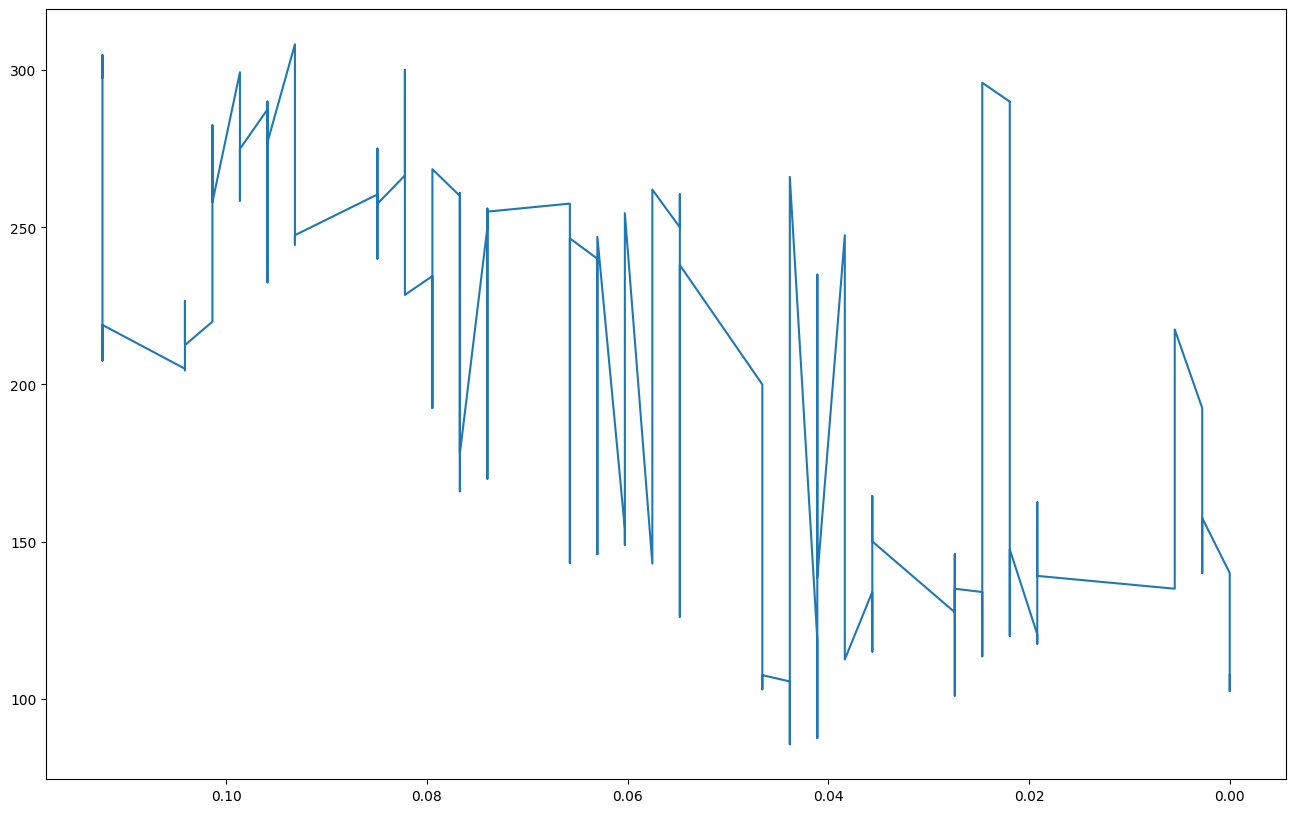

In [293]:
fig = plt.figure(figsize=(16,10))
x = totally_final_data.timeToMaturity.tolist()
y = totally_final_data.price.tolist()
plt.plot(x, y)
ax = plt.gca()
ax.invert_xaxis()
plt.show()
